**************************************
# **2a. Prova Prática de SCC275- Ciência de Dados**
## SCC - ICMC - USP
## **Profa. Roseli Ap. Francelin Romero**

2o. semestre de 2023
**************************************
- Gabriel de Avelar Las Casas Rebelo - 11800462
- Renan de Almeida Leandro - 11801157
**************************************

Vamos utilizar o conjunto de dados do UCI **Heart disease**.
Ele descreve algumas características de pacientes e como atributo alvo, a classe, se o paciente tem doença cardíaca ou não. No total o conjunto possui 13 atributos e 1 alvo:

**Atributo Definição Valor**

- age (Idade do paciente)
- sex (sexo do paciente)
- cp (Tipo de dor no peito)
- trestbps (Pressão sanguínea em repouso)
- chol (Colesterol em mg/dl)
- fbs (Taxa de açucar no sangue > 120 mg/dl)
- restecg (Resultado do ECG em repouso)
- thalach (Taxa de batimentos máxima)
- exang (Angina induzida por exercício)
- oldpeak = Depressão ST induzida por exercicio relativo a descanso.
- slope (o declive do pico ST)
- ca (número de veias colorizadas por fluoroscopia)
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
- target (possui problema cardíaco ou não)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Substitua 'nome_do_arquivo.csv' pelo nome real do seu arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/SCC0275 - Introdução a Ciência de Dados/Prova 2/clv_heart_disease.data', na_values = '?')

df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


1. **EXPLORAÇÃO de DADOS**(EDA)
**a)** Analise os atributos sex, age, chol, thalac, restecg, utilizando o **bar plot** (matplotlib.pyplot.bar ou seaborn.barplot)  para cada atributo.

**b)** Formule pelo menos 3 hipóteses baseado no item a). Por exemplo, o atributo Age não tem influência no valor do colesterol.

**c)** Reanalise as medidas do item a) por **classe**, isto é, faça o Boxplot por classe e atributos ou de maneira que o ajude a responder suas perguntas. Scatterplot, correlação e pairplot (seaborn) podem ajudar.

**d)** Reanalise suas perguntas (hipóteses), é possível respondê-las com a análise realizada? Escreva suas conclusões.
Caso não seja possível, pense nos motivos, falta de atributos, poucos dados, necessidade de EDA mais profunda?



## a) Bar plot atributos

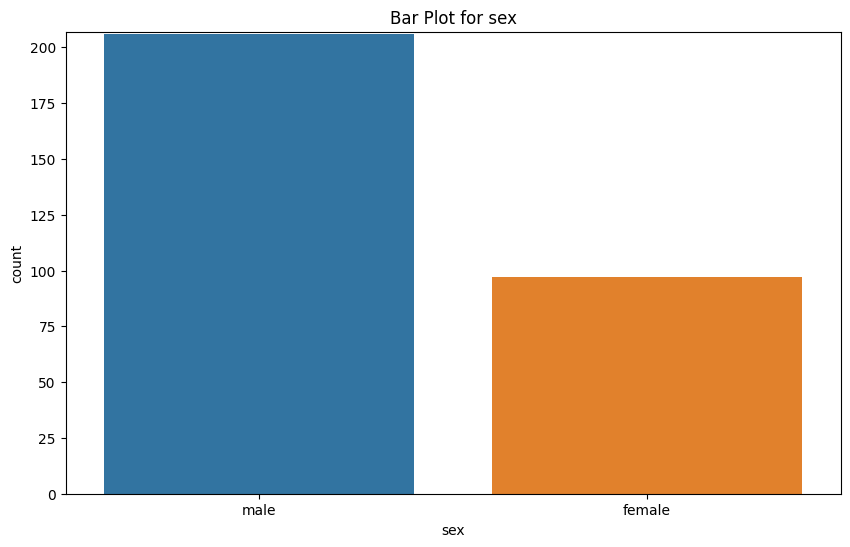

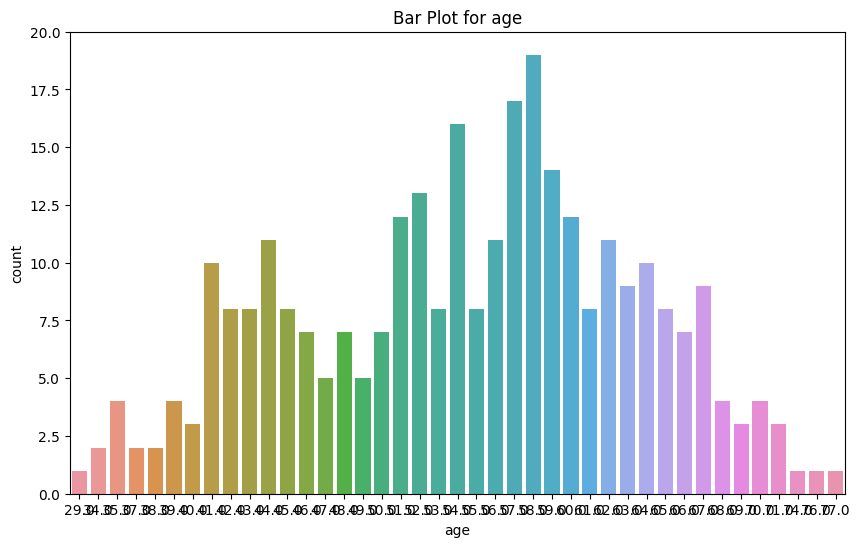

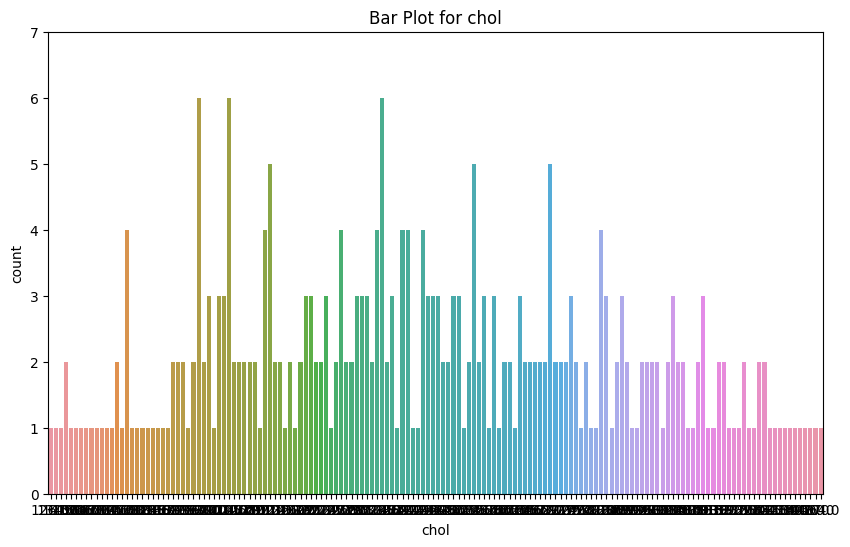

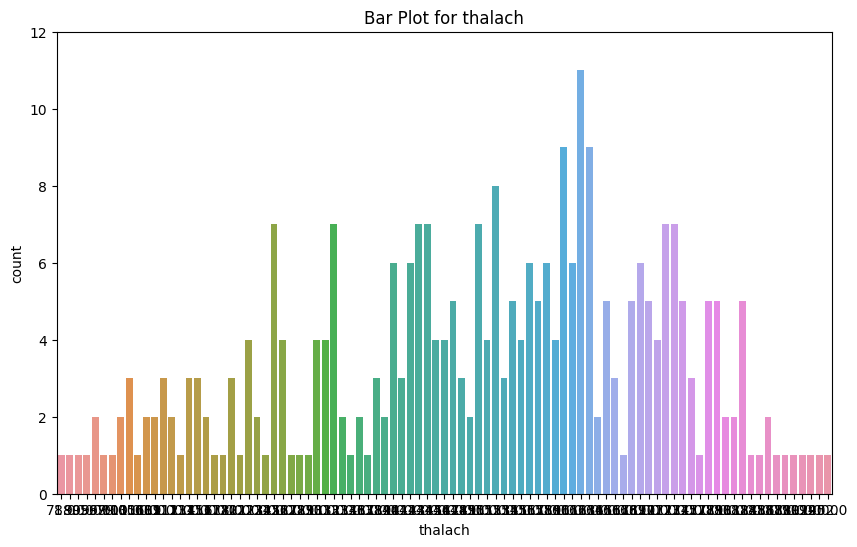

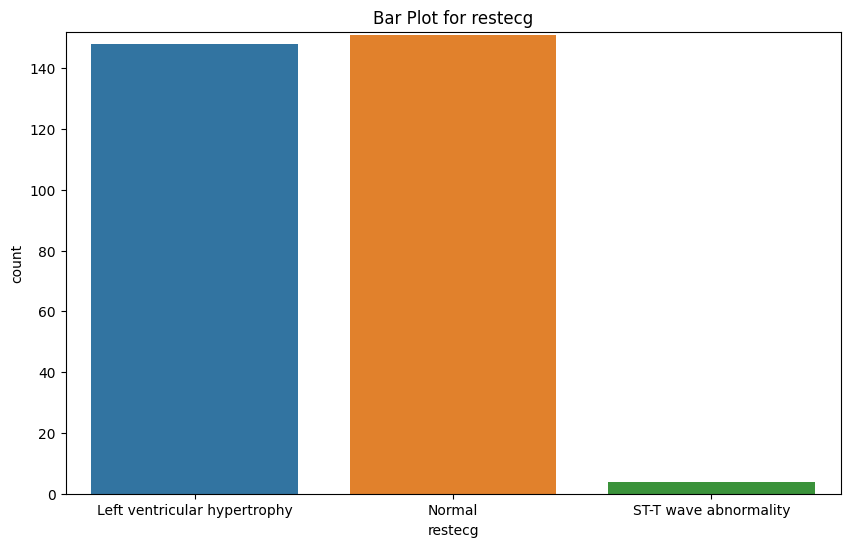

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Atributos a serem analisados
attributes = ['sex', 'age', 'chol', 'thalach', 'restecg']

# Bar Plot para cada atributo
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=attribute, data=df)
    plt.title(f'Bar Plot for {attribute}')

    # Set y-axis limit based on the maximum count
    max_count = df[attribute].value_counts().max()
    plt.ylim(0, max_count + 1)

    plt.show()

# b) Hipoteses


*   Homens com mais de 50 anos tem mais riscos de terem colesterol alto
*   Taxa de batimentos máxima diminue com a idade
*   Pessoas mais idosas costumam apresentar problemas no ECG







# c) Análise

## 1. Homens com mais de 50 anos têm mais riscos de terem colesterol alto

<ipython-input-37-a5338487b4c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


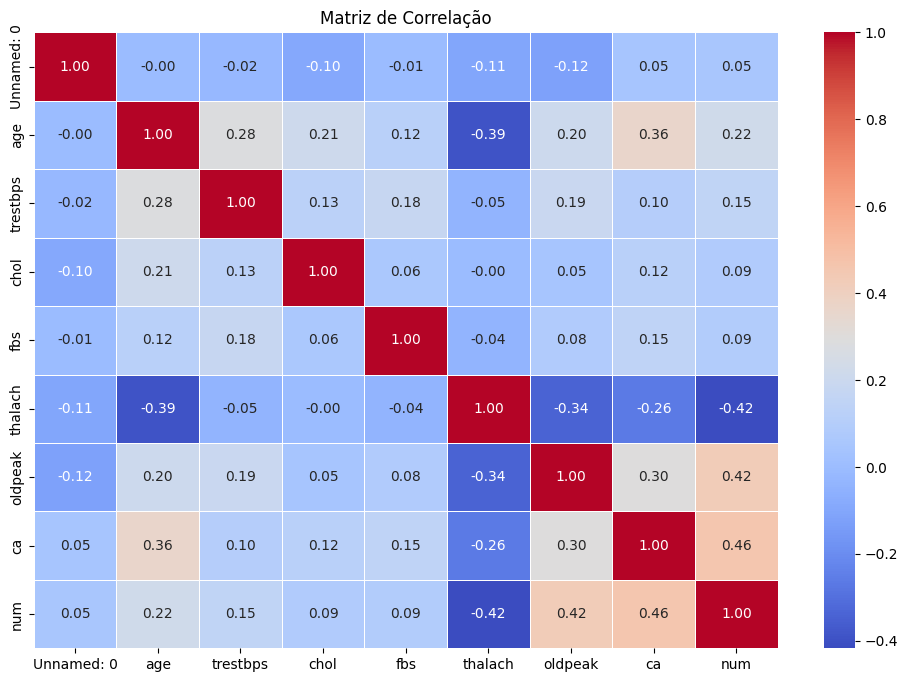

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Gera um mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## Pela matriz de correlacao, podemos perceber que o atributo com maior peso correlacional para "chol" é "age", ou seja, idade.

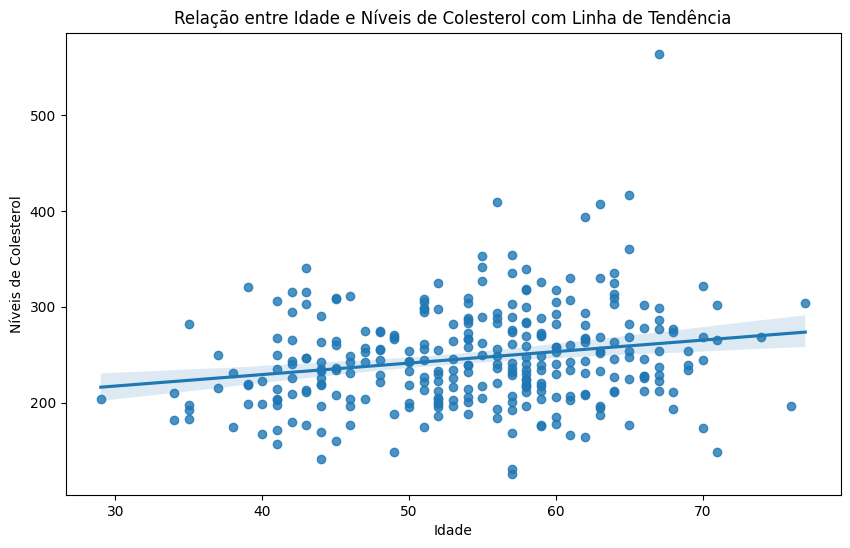

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='chol', data=df)
plt.title('Relação entre Idade e Níveis de Colesterol com Linha de Tendência')
plt.xlabel('Idade')
plt.ylabel('Níveis de Colesterol')
plt.show()


## Podemos ver que os casos de colesterol tornam-se mais numerosos com aumento da idade por volta dos 40 aos 70. Porém, tornam-se mais espaçados após os 70 anos

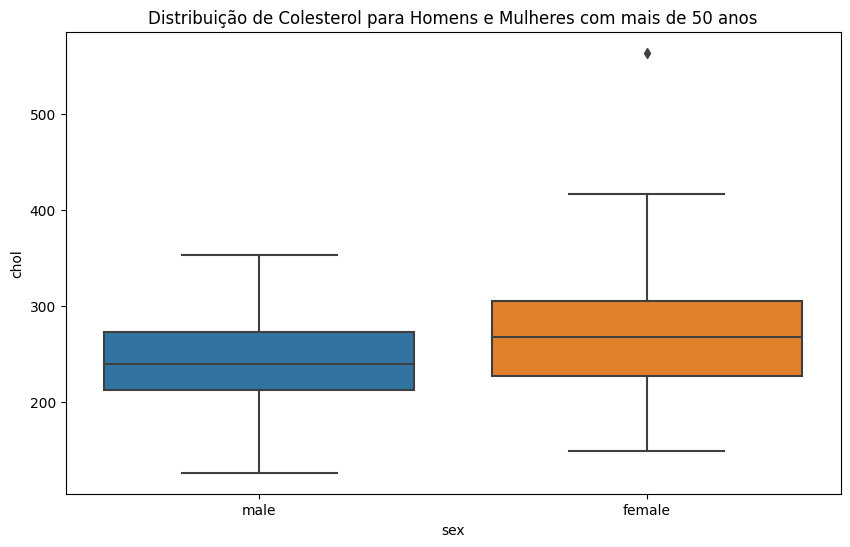

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='chol', data=df[df['age'] > 50])
plt.title('Distribuição de Colesterol para Homens e Mulheres com mais de 50 anos')
plt.show()


## Podemos perceber que apesar de os casos de colesterol estarem quase igualmente  distribuídos entre os dois sexos, ele costuma atingir valores maiores entre mulheres

# 2. Taxa de batimentos máxima diminui com a idade

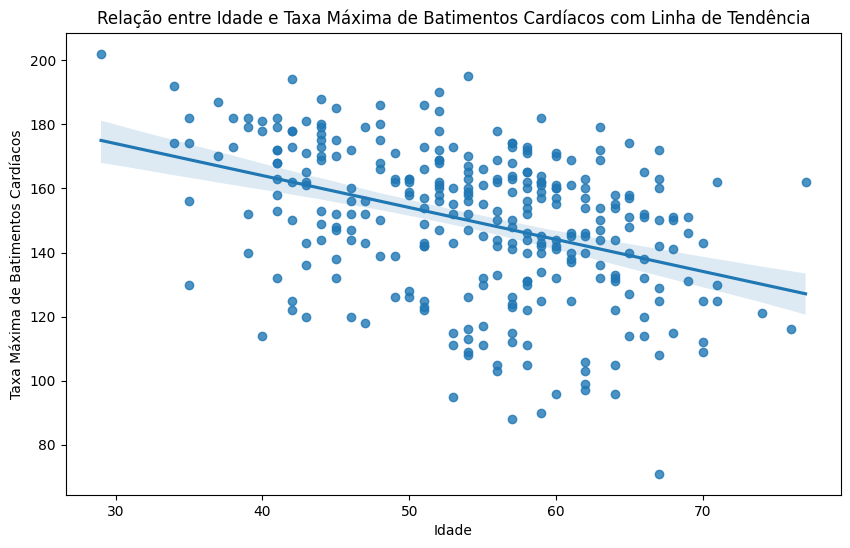

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=df)
plt.title('Relação entre Idade e Taxa Máxima de Batimentos Cardíacos com Linha de Tendência')
plt.xlabel('Idade')
plt.ylabel('Taxa Máxima de Batimentos Cardíacos')
plt.show()

## Pelo gráfico podemos claramente peceber uma tendencia decrescente entre os pontos conforme o avanço da idade

# 3. Pessoas mais idosas costumam apresentar problemas no ECG

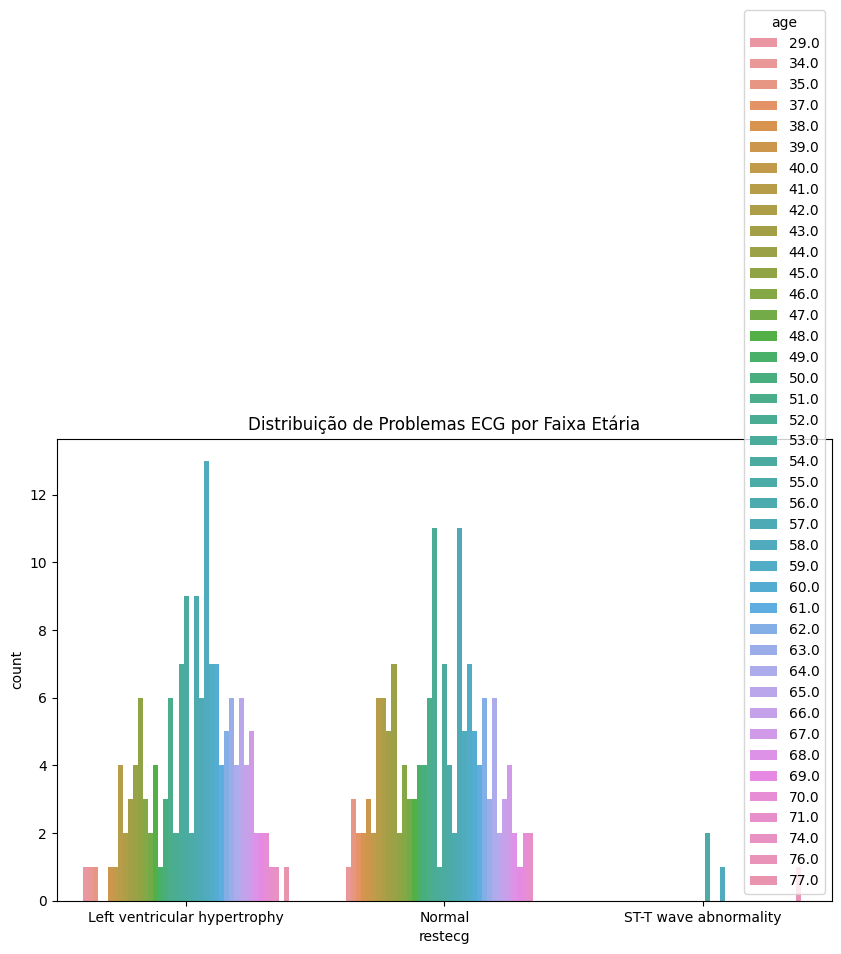

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='restecg', hue='age', data=df)
plt.title('Distribuição de Problemas ECG por Faixa Etária')
plt.show()

## Podemos perceber um número levemente distoate de pacientes com hipertrofia ventricular em comparação com aqueles com a leitura normal para as colunas de cor rosa  

## Conclusão: ao checar a validade das hipóteses com os padroes observados nos gráficos, pode se perceber que:


 * os homens apesar de terem uma tendencia a colesterol mais alto com o avanço da idade, tiveram em média, menos que as mulheres
 * os valores máximos de batimentos cardiacos tenderam a diminuir de acordo com a velhice
 * houve aumento levemente significante dos casos de ECG alterado de acordo com a idade



**2. PRÉ-PROCESSAMENTO DOS DADOS**

**a)** Explique qual é a diferença entre **isnull** e **isna** e como voce pode preencher um valor nulo.

R: Estes dois métodos de manipulação de dataframes possuem a mesma funcionalidade, sendo inclusive suas documentações idênticas. O motivo de existirem os dois é porque os dataframes da biblioteca **pandas** são baseados nos dataframes da linguagem **R**, onde *na* e *null* são considerados duas coisas diferentes. Para preencher um valor nulo, devemos analisar os dados. Por exemplo, para variáveis numéricas, podemos preencher os valores nulos utilizando da imputação pela mediana, enquanto que para variáveis categóricas, podemos utilizar da imputação pelo valor mais frequente.

**b)** Substitua valores faltantes, padronize os dados, etc. Faça tratamento de atributos categóricos.

**c)** Remova os atributos que achar necessário e justifique.  

**d)** Faça também a seleção dos atributos que achar mais relevantes de acordo com o método de sua preferência. Explique porque os escolheu.


Resposta do item B encontra-se nas células a seguir.

In [ ]:
#Para as variáveis numéricas, os valores faltantes foram subtsituidos utilizando a estratégia de mediana (sklearn.impute.SimpleImputer).
#Em seguida, estas variáveis foram padronizadas. (sklearn.preprocessing.StandarScaler).

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Quantidade de valores faltantes para cada variável
missing_values = df.isnull().sum()

# 2. Identificar o tipo de dado de cada variável
data_types = df.dtypes

# Exibindo os resultados
print("1. Quantidade de Valores Faltantes:")
print(missing_values)
print("\n2. Tipos de Dados das Variáveis:")
print(data_types)

1. Quantidade de Valores Faltantes:
Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64

2. Tipos de Dados das Variáveis:
Unnamed: 0      int64
age           float64
sex            object
cp             object
trestbps      float64
chol          float64
fbs           float64
restecg        object
thalach       float64
exang          object
oldpeak       float64
slope          object
ca            float64
thal           object
num             int64
dtype: object


In [ ]:
df_copy = df.copy()

# Selecionando as variáveis numéricas
numeric_variables = ['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

# Criando um SimpleImputer com estratégia de substituição pela mediana
imputerNumerical = SimpleImputer(strategy='median')

# Aplicando a transformação nas variáveis numéricas
df_copy[numeric_variables] = imputerNumerical.fit_transform(df_copy[numeric_variables])

# Criando um StandardScaler para padronizar as variáveis
scaler = StandardScaler()

# Aplicando o StandardScaler nas variáveis numéricas
df_copy[numeric_variables] = scaler.fit_transform(df_copy[numeric_variables])

# Verificando se ainda existem valores faltantes (não deveria haver, pois foram imputados)
missing_values_after_imputation = df_copy[numeric_variables].isnull().sum()

# Exibindo os resultados
print("Quantidade de Valores Faltantes Após Imputação:")
print(missing_values_after_imputation)

Quantidade de Valores Faltantes Após Imputação:
age         0
trestbps    0
chol        0
fbs         0
thalach     0
oldpeak     0
ca          0
dtype: int64


In [ ]:
# Selecionando as variáveis categóricas
categorical_variables = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'num']

# Criando um SimpleImputer com estratégia de substituição pela mais frequente
imputerCategorical = SimpleImputer(strategy='most_frequent')

# Aplicando a transformação nas variáveis categóricas
df_copy[categorical_variables] = imputerCategorical.fit_transform(df_copy[categorical_variables])

# Criando um LabelEncoder para codificar as variáveis categóricas
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder nas variáveis categóricas
for var in categorical_variables:
    df_copy[var] = label_encoder.fit_transform(df_copy[var])

# Verificando se ainda existem valores faltantes
missing_values_after_imputation = df_copy[categorical_variables].isnull().sum()

# Exibindo os resultados
print("Quantidade de Valores Faltantes Após Imputação:")
print(missing_values_after_imputation)

Quantidade de Valores Faltantes Após Imputação:
sex        0
cp         0
restecg    0
exang      0
slope      0
thal       0
num        0
dtype: int64


De forma sucinta, o tratamento realizado corresponde aos seguintes passos:
- Para as variáveis numéricas, os valores faltantes foram subtsituídos utilizando a estratégia de mediana. Em seguida, estas variáveis foram padronizadas.
- Para as variáveis categóricas, os valores faltantes foram substituídos utilizando a estratégia de mais frequente. Em seguida, estas variáveis foram padronizadas.

Resposta do item C encontra-se nas céluas a seguir.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Calcular a variância de cada variável categórica
variances = df_copy.var()

print(variances)

Unnamed: 0    7676.000000
age              1.003311
sex              0.218368
cp               1.064651
trestbps         1.003311
chol             1.003311
fbs              1.003311
restecg          0.276703
thalach          1.003311
exang            0.220707
oldpeak          1.003311
slope            0.379735
ca               1.003311
thal             0.339912
num              0.249120
dtype: float64


<ipython-input-48-8bf50f081659>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlation_matrix = df.corr().abs()


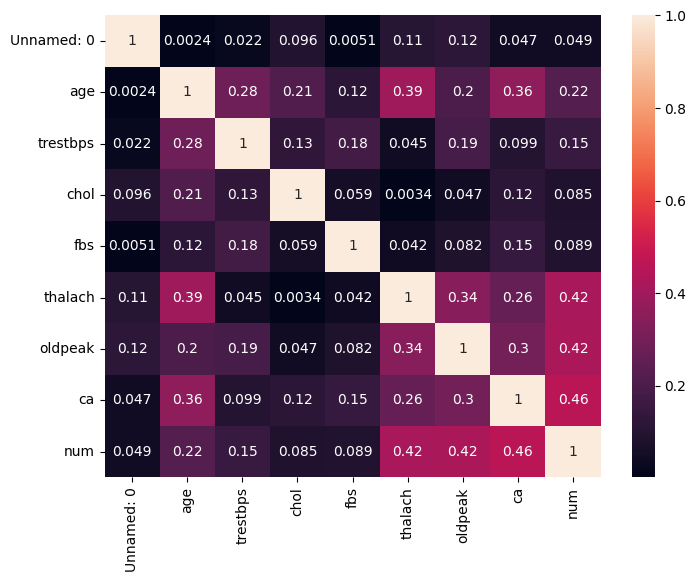

In [ ]:
target_correlation_matrix = df.corr().abs()
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation_matrix, annot=True)
plt.show()

Primeiramente, a variável de identificação dos dados poderia ser removida do dataframe, pois esta não deve influenciar na variável alvo. Ainda, com base na matriz de correlação entre as variáveis, vemos que as variáveis **chol** e **fbs** possuem uma correlação muito baixa com a variável alvo, podendo estas também serem removidas do dataframe.

In [ ]:
# Criando um novo DataFrame sem as colunas especificadas
new_df = df_copy.drop(['Unnamed: 0', 'chol', 'fbs'], axis=1)

In [ ]:
new_df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,3,0.757525,0,0.017197,0,1.087338,0,-0.711131,0,0
1,1.392002,1,0,1.611220,0,-1.821905,1,0.397182,1,2.504881,1,1
2,1.392002,1,0,-0.665300,0,-0.902354,1,1.346147,1,1.432877,2,1
3,-1.932564,1,2,-0.096170,1,1.637359,0,2.122573,0,-0.711131,1,0
4,-1.489288,0,1,-0.096170,0,0.980537,0,0.310912,2,-0.711131,1,0


Resposta do item D encontra-se nas células a seguir:

De acordo com a matriz de correlação, os atributos mais relevantes para a classificação se há ou não problema cardíaco em um indivídio são os atributos **thalach**, **oldpeak** e **ca**.

#**3 - Modelagem dos Dados e Avaliação de Desempenho**
Pede-se:
**a)** Usar a função abaixo para classificação da sua base de dados e imprimir os valores de desempenho obtidos.

**b)** Baseado nos resultados do item anterior, calcule o valor de AUC para o melhor classificador?

**c)** Reduzir a dimensionalidade dos dados usando a tecnica PCA mantendo ao menos 90% da variância.

**d)** Verificar e imprimir o desempenho dos classificadores com a redução da dimensionalidade e calcular a porcentagem de variação obtida no desempenho.

Resposta do item A encontra-se nas células a seguir.

In [ ]:
X = new_df.drop(['num'], axis=1)
y = new_df['num']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
}

for classificador_name in classificadores:
  modelo = classificadores[classificador_name]["modelo"]
  classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=5)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))

Multi-Layer Perceptron (15,): 82.16 
SVM Polinomial Grau 3: 74.87 
Árvore Decisão Critério Gini: 73.92 


Resposta do item B encontra-se nas células a seguir.

Com base nos resultados obtidos, o melhor classificador foi o Multi-Layer Perceptron (MLP)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

In [ ]:
from sklearn.metrics import roc_auc_score

classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1, probability=True), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
}

melhor_auc = 0
melhor_classificador = None

for classificador_name in classificadores:
    modelo = classificadores[classificador_name]["modelo"]
    classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=5)

    auc = roc_auc_score(y, modelo.fit(X, y).predict_proba(X)[:, 1])

    print("%s - AUC: %.2f, Média de Cross-Val: %.2f" % (classificador_name, auc, 100*np.mean(classificadores[classificador_name]["scores"])))

    if auc > melhor_auc:
        melhor_auc = auc
        melhor_classificador = classificador_name

print("\nMelhor Classificador: %s com AUC: %.2f" % (melhor_classificador, melhor_auc))


Multi-Layer Perceptron (15,) - AUC: 0.95, Média de Cross-Val: 82.16
SVM Polinomial Grau 3 - AUC: 1.00, Média de Cross-Val: 74.87
Árvore Decisão Critério Gini - AUC: 1.00, Média de Cross-Val: 73.59

Melhor Classificador: SVM Polinomial Grau 3 com AUC: 1.00


Resposta do item C encontra-se nas células a seguir.

In [ ]:
num = new_df['num']
df_minus_num = new_df.drop(columns=['num'], axis=1)

In [ ]:
from sklearn.decomposition import PCA

# Criando uma instância de PCA para 90% da variância dos dados
pca_90 = PCA(0.9, svd_solver='full')

# Aplicando a redução de dimensionalidade
X_pca_90 = pca_90.fit_transform(df_minus_num)

print(pca_90.components_)

[[ 0.42527322  0.02079221 -0.30758604  0.21730529 -0.05065596 -0.47791704
   0.1351565   0.44340605 -0.20711099  0.42223582  0.09927047]
 [ 0.35763796 -0.06057367  0.63198583  0.64334549 -0.04349691  0.18430563
  -0.12029832  0.03955391  0.00534867 -0.01195842 -0.05529975]
 [-0.46859796  0.06301279  0.17327606  0.07748084  0.02991946 -0.01809953
   0.07434449  0.68107007 -0.3405798  -0.38515069  0.07399666]
 [-0.2095527  -0.01257624 -0.61722353  0.66065656 -0.04864015  0.28990298
   0.08584354 -0.10816372  0.08413131 -0.14484507  0.07043619]
 [ 0.25971955 -0.08381952 -0.06178007  0.07686372  0.03090235 -0.55409001
   0.06557355 -0.26176986 -0.06641104 -0.72266236 -0.09137763]
 [-0.57993222  0.11063711  0.24184169  0.28880649  0.00097205 -0.55061939
   0.06577246 -0.30484504  0.07635727  0.32128086 -0.00710427]
 [-0.10205889 -0.34686092 -0.11188359  0.02906369 -0.01996728 -0.01123566
  -0.14738972  0.09075334 -0.13635034  0.10308016 -0.89230437]
 [ 0.00672682 -0.16896317 -0.02601372  0.

Resposta do item D encontra-se nas células a seguir.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
}

for classificador_name in classificadores:
  modelo = classificadores[classificador_name]["modelo"]
  classificadores[classificador_name]["scores"] = cross_val_score(modelo, df_minus_num, num, cv=5)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))

Multi-Layer Perceptron (15,): 82.16 
SVM Polinomial Grau 3: 74.87 
Árvore Decisão Critério Gini: 75.56 


- Para o **Multi-Layer Perceptron** e para o **SVM Polinomial Grau 3**, não houve alteração no desempenho.
- Para a **Árvore Decisão Critério Gini**, houve uma melhora de aproximadamente 2,67% no resultado.